In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score,accuracy_score



In [7]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df.rename(columns={'v1':'Class','v2':'Text'},inplace=True)
df['numClass'] = df['Class'].map({'ham':0, 'spam':1})
df['Count']=0
for i in np.arange(0,len(df.Text)):
    df.loc[i,'Count'] = len(df.loc[i,'Text'])

In [13]:
# Unique values in target set
print("Unique values in the Class set: ", df.Class.unique())

Unique values in the Class set:  ['ham' 'spam']


In [15]:
ham  = df[df.numClass == 0]
ham_count  = pd.DataFrame(pd.value_counts(ham['Count'],sort=True).sort_index())
print("Number of ham messages in data set:", ham['Class'].count())
#print("Ham Count value", ham_count['Count'].count())


Number of ham messages in data set: 4825


C:\Users\KIIT\AppData\Local\Temp\ipykernel_24640\2397229559.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ham_count  = pd.DataFrame(pd.value_counts(ham['Count'],sort=True).sort_index())


In [17]:
spam = df[df.numClass == 1]
spam_count = pd.DataFrame(pd.value_counts(spam['Count'],sort=True).sort_index())
print("Number of spam messages in data set:", spam['Class'].count())
#print("Spam Count value:", spam_count['Count'].count())


Number of spam messages in data set: 747


C:\Users\KIIT\AppData\Local\Temp\ipykernel_24640\4098785973.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  spam_count = pd.DataFrame(pd.value_counts(spam['Count'],sort=True).sort_index())


In [21]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
#Removing stopwords of English
stopset = set(stopwords.words("english"))

In [25]:
#Initialising Count Vectorizer
vectorizer = CountVectorizer(stop_words=stopset,binary=True)
vectorizer = CountVectorizer()

In [31]:
X = vectorizer.fit_transform(df.Text)
# Extract target column 'Class'
y = df.numClass

In [33]:
#Performing test train Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=None)

In [35]:
# Show the results of the split
print("\n")
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("\n")




Training set has 3900 samples.
Testing set has 1672 samples.




In [57]:
objects = ('Multi-NB','SVM','KNN')

In [59]:
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

In [61]:
 # function to predict features 
def predict_labels(clf, features):
    return(clf.predict(features))

In [63]:
# Initialize the five models
A = MultinomialNB(alpha=1.0,fit_prior=True)
B=  LinearSVC()
C = KNeighborsClassifier(n_neighbors=1)
# D = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=None)
# E = AdaBoostClassifier(n_estimators=100) 

In [65]:
clf = [A,B,C]
acc_score = [0,0,0]

In [67]:
for a in range(0,3):
    print(objects[a])
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val = f1_score(y_test, y_pred)
    acc_score[a]=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    print("Accuracy in %:")
    print(acc_score[a]*100)
    print("F1 Score")
    print(pred_val)
    print("\n")

Multi-NB
Accuracy in %:
98.38516746411483
F1 Score
0.9382151029748284


SVM
Accuracy in %:
98.20574162679426
F1 Score
0.9271844660194175


KNN
Accuracy in %:
94.91626794258373
F1 Score
0.7632311977715878




In [69]:
print("Objects:", objects, "Length:", len(objects))
print("Accuracy Scores:", acc_score, "Length:", len(acc_score))


Objects: ('Multi-NB', 'SVM', 'KNN') Length: 3
Accuracy Scores: [0.9838516746411483, 0.9820574162679426, 0.9491626794258373] Length: 3


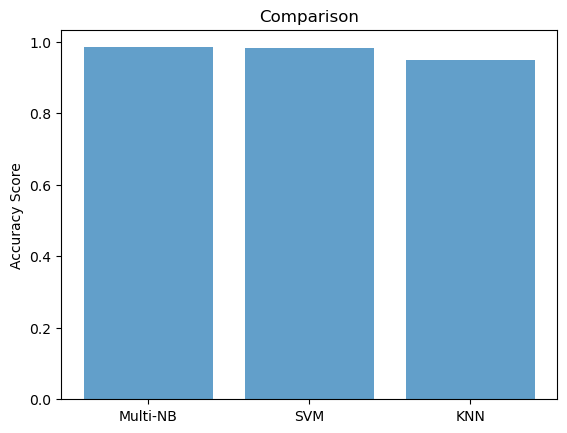

In [71]:
min_len = min(len(objects), len(acc_score))
objects = objects[:min_len]
y_val = acc_score[:min_len]
y_pos = np.arange(min_len)

plt.bar(y_pos, y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Comparison')
plt.show()
